##Playground Part

In [116]:
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [117]:
def load_data():
    """Load the Boston dataset."""

    boston = datasets.load_boston()
    return boston

In [118]:
# Prepare some globals
city_data = load_data()
boston = datasets.load_boston()
X, y = city_data.data, city_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [119]:
def split_data(city_data):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    return X_train, y_train, X_test, y_test

In [120]:
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""
    
    return mean_squared_error(label, prediction)

In [121]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print "Decision Tree with Max Depth: "
    print depth

    for i, s in enumerate(sizes):

        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err)

In [122]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))
        
    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)

In [123]:
def learning_curve_graph(sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.show()

In [124]:
def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.show()

In [125]:
def fit_predict_model(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    
    reg = GridSearchCV(regressor, param_grid=parameters, scoring='mean_squared_error', cv=3)
    reg.fit(X, y)
    
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict(x)
    
    return reg.best_estimator_, y

Decision Tree with Max Depth: 
1


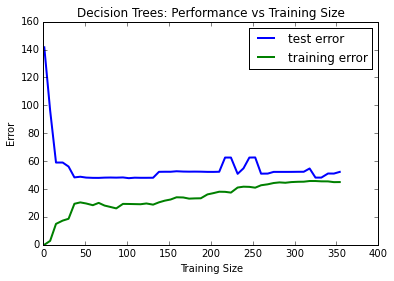

Decision Tree with Max Depth: 
2


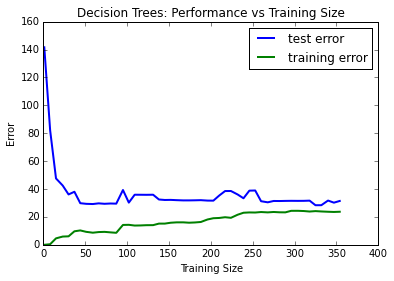

Decision Tree with Max Depth: 
3


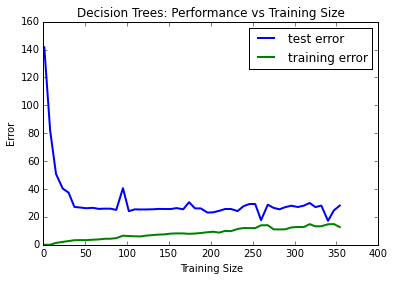

Decision Tree with Max Depth: 
4


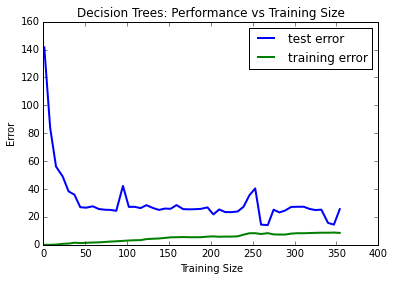

Decision Tree with Max Depth: 
5


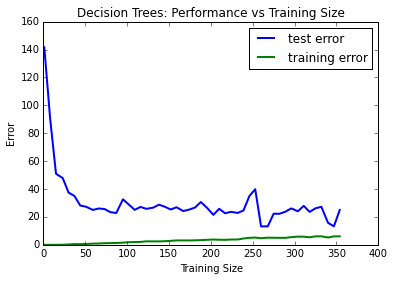

Decision Tree with Max Depth: 
6


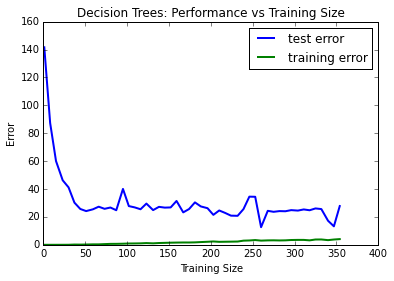

Decision Tree with Max Depth: 
7


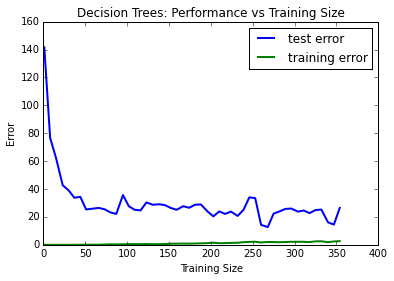

Decision Tree with Max Depth: 
8


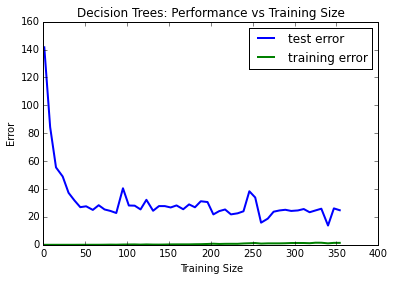

Decision Tree with Max Depth: 
9


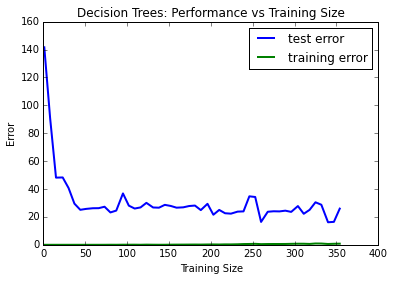

Decision Tree with Max Depth: 
10


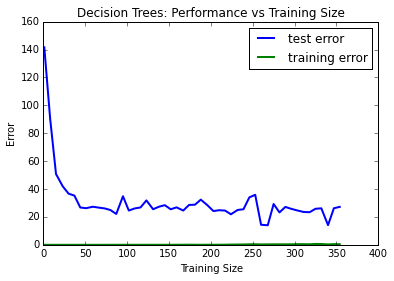

Model Complexity: 


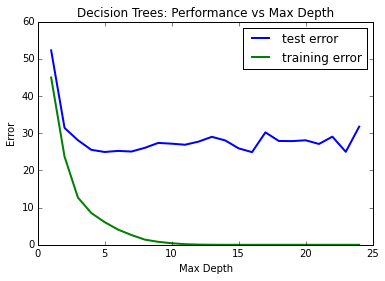

In [126]:
city_data = load_data()

# Explore the data
#explore_city_data(city_data)

# Training/Test dataset split
X_train, y_train, X_test, y_test = split_data(city_data)

# Learning Curve Graphs
max_depths = [1,2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    learning_curve(max_depth, X_train, y_train, X_test, y_test)

# Model Complexity Graph
model_complexity(X_train, y_train, X_test, y_test)

In [127]:
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


##Analysis Part

### Basic Statistical Analysis and Data Exploration

Starting from the basics, we can measure the central tendency metrics.

In [128]:
data_size = len(boston.data)
number_of_features = len(boston.data[0])
min_price, max_price = np.min(boston.target), np.max(boston.target)
mean_price = np.mean(boston.target)
median_price = np.median(boston.target)
std = np.std(boston.target)

print "Let's see the shape of our data (number of samples X number of features): {0}.".format(boston.data.shape)
print "1. Size of data (number of houses): {0}.".format(data_size)
print "2. Number of features: {0}.".format(number_of_features)
print "3. Minimum price: {0}.".format(min_price)
print "4. Maximum price: {0}.".format(max_price)
print "5. Mean price: {0}.".format(mean_price)
print "6. Median price: {0}.".format(median_price)
print "7. Std deviation: {0}.".format(std)

Let's see the shape of our data (number of samples X number of features): (506, 13).
1. Size of data (number of houses): 506.
2. Number of features: 13.
3. Minimum price: 5.0.
4. Maximum price: 50.0.
5. Mean price: 22.5328063241.
6. Median price: 21.2.
7. Std deviation: 9.18801154528.


Next, it's always a good idea to visualize our target (house prices) and see the histogram.

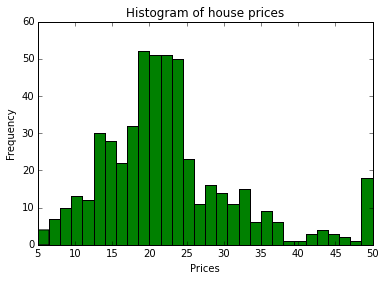

In [129]:
pl.figure()
pl.title('Histogram of house prices')
pl.hist(boston.target, bins=30, color='g')
pl.xlabel('Prices')
pl.ylabel('Frequency')
pl.show()

Looks quite similar to the normal distribution, but there's a peak on the right side of this histogram.

Another good thing would be to visualize our variables and see whether we can understand the data better.

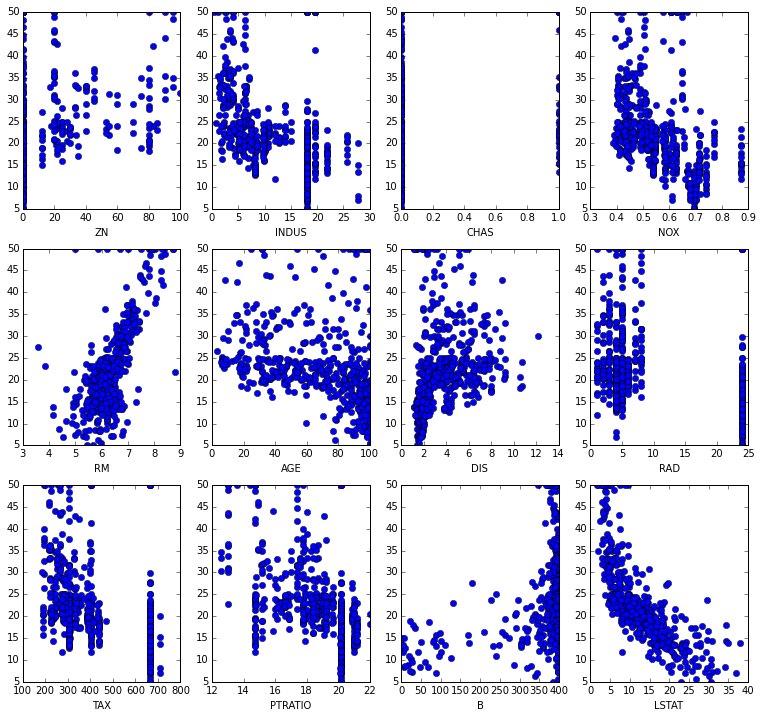

In [130]:
pl.figure(figsize=(13,12))
for feature in xrange(13):
    pl.subplot(3,4,feature)
    pl.xlabel(boston.feature_names[feature])
    pl.plot(X[:,feature], y, 'o')
pl.show()

There are several notable observations:

* Some variables (RM, LSTAT) can be explained by a linear model, some (AGE, DIS) need more complex nonlinear models (polynomials, SVMs with poly or rbf kernels, etc).
* Variance among variables varies a lot. Features like ZN, B will not be very helpful for our model as they don't explain any substantial percentage of variance.
* CHAS variable is totally useless for our regression model (actually, it's a dummy feature).

### Evaluating Model Performance

**Measure of model performance**

There is a number of metrics which can be good for model performance evaluation. Among these, I'd highlight four of the most popular (available in [scikit-learn](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics):

* r-squared (coefficient of determination)
* absolute errors (MedAE, MAE)
* mean squared error (MSE) or root MSE (RMSE) -- my choice, see explanation below
* explained variance score.

To start, we have to discard r-squared and explained variance score as they don't exactly represent the *error* of the regression. They describe the general *quality* or *fit* of our model (how well our model predicts new values). Moreover, we use decision tree-based regression with nonlinear patterns in the data. For such data, r-squared is not quite an appropriate metric (as I [pointed out](https://discussions.udacity.com/t/choosing-between-mse-and-r-2/43669/5?u=kirill_at_udacity) on the forum).

To illustrate this idea, we have to fast-forward to the final part of this project (validating the results). 

Let's isolate the variables of our dataset, fit the decision tree using a single feature to see how much variance it explains on its own and calculate r-squared for each univariate model. We should see at least a non-negative r-squared score for each model. After all, we don't just take a random model , we try to fit one using data.

Here are the results:

* CRIM: 0.160412728397.
* ZN: 0.117322862274.
* INDUS: 0.212594932704.
* CHAS: 0.0344639373939.
* NOX: 0.274834344322.
* RM: 0.463791854274.
* AGE: -0.07255959731.
* DIS: -0.0524267511531.
* RAD: 0.182389977044.
* TAX: 0.186606382776.
* PTRATIO: 0.204462762965.
* B: 0.108040358707.
* LSTAT: 0.552291408673.

In our case, 'age' and 'dis' have negative r-squared values. This means that either our models make no sense and they are  worse than the null hypothesis (straight horizontal line), or our score metric is broken.

To visualize our model, let's draw decision trees for these dimensions.

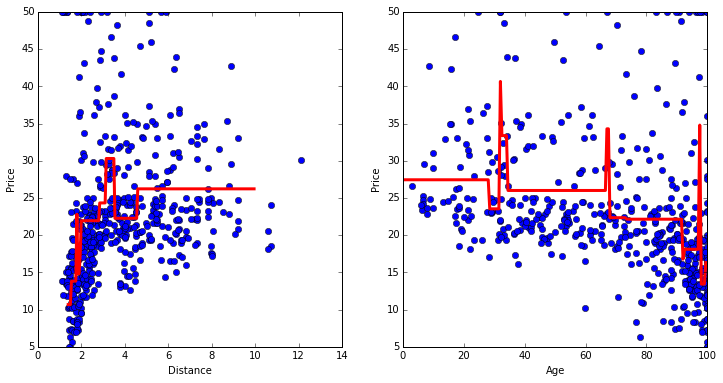

In [131]:
reg_distance = DecisionTreeRegressor(max_depth=4)
reg_age =  DecisionTreeRegressor(max_depth=4)

reg_distance.fit(X_train[:,7].reshape(-1,1), y_train)
reg_age.fit(X_train[:,6].reshape(-1,1), y_train)

x_distance_tests = np.arange(1.4, 10.0, 0.05)[:, np.newaxis]
y_distance_tests = reg_distance.predict(x_distance_tests)

x_age_tests = np.arange(.5, 100.0, 0.5)[:, np.newaxis]
y_age_tests = reg_age.predict(x_age_tests)


pl.figure(figsize=(12,6))
pl.subplot(1,2,1)

pl.plot(boston.data[:,7], boston.target, 'o')
pl.plot(x_distance_tests, y_distance_tests, '-', c='r', linewidth=3)
pl.xlabel('Distance')
pl.ylabel('Price')
pl.subplot(1,2,2)

pl.plot(boston.data[:,6], boston.target, 'o')
pl.plot(x_age_tests, y_age_tests, '-', c='r', linewidth=3)
pl.xlabel('Age')
pl.ylabel('Price')

pl.show()


Of course, a lot of variance is not explained by our decision trees, but they do capture trends better than a null hypothesis. This means that calculating r-squared in our particular model is not a good choice, because of the nonlinearity of our variables.

Explained variance score is closely related to r-square which also calculates the percentage of our variance that is correctly predicted by the model. For the reasons mentioned above, we should not use it either.

We are left with absolute, mean squared and root mean squared error metrics. There are two options to consider: MAE vs MSE or RMSE. The main point here is to decide how we are going to treat outliers (it's quite obvious that MSE/RMSE will punish the model a lot in case of outliers). I'd say this is a good trait since the presence of a substantial number of outliers may signal that our model is biased.

Finally, the choice between MSE or RMSE is not critical: they both provide the same information.

I'd choose MSE. By the way, sklearn.tree.DecisionTreeRegressor accepts only MSE as a function to measure the quality of the split -- and this is a reasonable choice.

**Importance of splitting the data into training and testing sets**

We should split the data into training and testing parts to cope with overfitting of our model. Overfitting occurs when the model becomes too sophisticated (uses lots of features or high order polynomials to fit the data). We can get fantastic fit scores on our training data, but due to the  high complexity of the model, it may fail to correctly generalize the data (which is our goal).

To validate our model, we split our data into training and testing sets. We fit it with the training data and calculate its performance on an independent testing set to ensure it correctly predicts unseen data.

Without splitting the data, we lose our ability to correctly measure the performance of our model and detect overfitting with an independent dataset.

All of this is even more important in the case of choosing decision trees as a model. DTs are known for being easily overfitted.

**Use of grid search**

Grid search is one of the algorithms which optimize a set of parameters called hyperparameters. We have to specify those values outside of our training procedure, which means that we still have to do it manually. 

For decision trees the *max_depth* is our single hyperparameter. Grid search goes through a grid of hyperparameters (a simple list in our case), cross-validates the model with each combination and chooses the tune with the best score.

For us, max_depth hyperparameter is a regularization metric that prevents our model from overfitting. As I mentioned before, decision trees are prone to overfitting, and being able to select max_depth automatically will definitely improve our overall performance.

**Cross-validation and its use with grid search**

Cross-validation assesses how well the trained model generalizes an independent dataset (predicts new values) and it serves as a reality check for overfitting.

A simple way to cross-validate our model is to split our the whole dataset into independent training and testing sets and calculate the performance using the test set. In this case, unfortunately, test data may still affect the complexity of our model. It may result in overfitting on test data. To cope with this we can split our training data further into training and *validation* subsets and optimize the performance on *validation* data. Test dataset is used to calculate the final score.

When we are have a limited amount of data, we can use a more advanced cross-validation method called k-fold CV. In this case we don't have to split the data into training and validation--and can use all the data to train and validate our model.

In our case, we use a simple train-test split cross-validation (without a dedicated validation subset) in conjunction with grid search to ensure our model does not suffer from overfitting.

To put it simple, cross-validation ensures that the model generalizes well to an independent dataset using the regularization metric (max_depth) given. Grid search iterates over many different max_depth values and finds the one that maximizes cross-validated model performance.

### Analyzing Model Performance

**General trend of training and testing errors**

From the graphs it's clearly visible that the training error increases while the training set increases, and at some point the error percentage flattens out. This is understandable: in case of few samples, the model fits the data easily even if its complexity is limited (low depth). The more points we add, the harder it is to fit them all.

For the testing error, its behavior is different and correlates with the model prediction quality. The error is the highest when the training size is small (the model has not yet generalized to the data) and flattens out when the model is fully trained.

Decision Tree with Max Depth: 
1


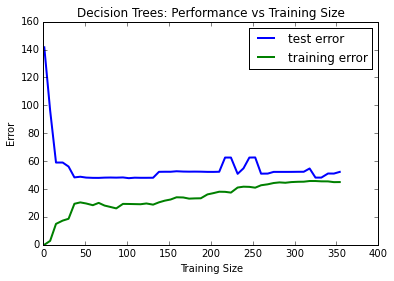

Decision Tree with Max Depth: 
10


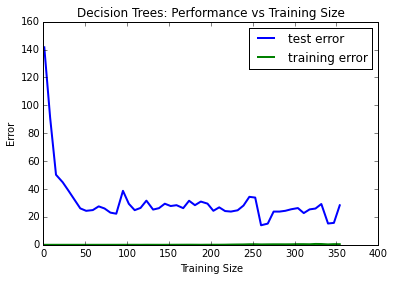

In [132]:
learning_curve(1, X_train, y_train, X_test, y_test)
learning_curve(10, X_train, y_train, X_test, y_test)

**Bias/variance problems in trained models**

Looking at the learning curve with max_depth = 1, we notice that the model is highly biased when fully trained. It's easy to see if we compare its training set error rate with the one with max_depth = 10. The only positive moment in this biased model is that its training and test error converge. It means the model performs similarly on training and test sets.

In contrast, the model with max_depth = 10 suffers from severe overfitting. Error rates difference between its test and training sets looks much higher than the one in the model with max_depth = 1. Test error in this sophisticated model is lower than in the first model, but its simplicity is lost.

**Best generalization among these models**

The best generalized model performs well on the new data (testing set) and keeps the underlying complexity as simple as possible. In our scenario, we should pick the model with the lowest depth and lowest error possible.

By looking at the model complexity graph, it's worth mentioning that the training error gradually decreases as we increase the complexity of the model. Initially, the test error decreases as well, but at the certain point (at max_depth = 4, I'd argue) it stalls. From this point, the gap between training and test errors starts getting wider and the model becomes more and more overfitted.

As I already mentioned, I'd consider the sweet spot max_depth = 4. At this stage the model has one of the smallest errors on the testing set (good fit) and does not yet suffer from overfitting.

Model Complexity: 


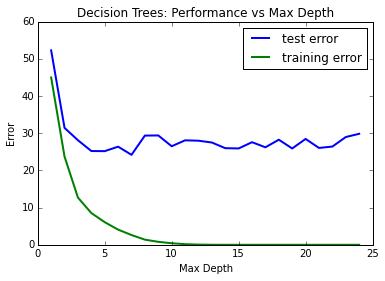

In [133]:
model_complexity(X_train, y_train, X_test, y_test)

### Model Prediction

**Finding the best max_depth and prediction**

To find the best max_depth and average prediction for the house price, I slightly modified the fit_predict_model function to return max_depth and predicted values. Then I ran this function 200 times and got the values below.

In [149]:
res = [fit_predict_model(city_data) for _ in xrange(200)]
best_depths = []
predictions = np.array([]) 

for model in res:
    best_depths.append(model[0].max_depth)
    predictions = np.append(predictions, model[1])

(array([ 96.,  13.,   0.,  36.,   0.,  11.,  18.,   0.,  18.,   8.]),
 array([  4. ,   4.6,   5.2,   5.8,   6.4,   7. ,   7.6,   8.2,   8.8,
          9.4,  10. ]),
 <a list of 10 Patch objects>)

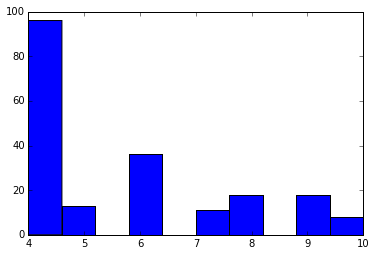

In [152]:
pl.hist(best_depths)

max_depth = 4 is clearly the winner here, which corresponds well with our guess in the previous section. The predicted price for this model is approximately 21.63.

###Validating the prediction
We calculated our house price, 21.63, now we need to validate it.

*Step 1*. Earlier we obtained basic central tendency metrics: mean, median, standard deviation. As the first reality check, we can just compare our prediction with these.

* Mean price: 22.5328063241.
* Median price: 21.2.
* Std deviation: 9.18801154528.

We see that our target almost matches the median price. To be more specific, our prediction is (22.53-21.63) / 9.19 ≈ 0.098 standard deviations from the mean. This prediction does not look like an outlier.

*Step 2*. We can be more concrete in finding whether our prediction is an outlier. An outlier is a value lying outside the bounds: 

(Q1 - 1.5 * IQR; Q3 + 1.5 * IQR) 

where Q1 and Q3 are the first (25th percentile) and the third quartile (75th percentile), respectively. IQR is the interquartile range.

Let's calculate them.

In [ ]:
from scipy.stats import mstats
quantiles = mstats.mquantiles(boston.target, axis=0)
q1, q3 = quantiles[0], quantiles[2]
iqr = q3 - q1
not_outlier_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
print "Quartiles (or quantiles) Q1, Q2, Q3: {0}".format(quantiles)
print "Values within this range are not outliers: {0}".format(not_outlier_interval)

We see that the values located within (4.975, 37.015) are not outliers. Thus, our prediction, 21.63, is not an outlier either.

Now we can state that this predicted value is somewhat an average house price.

*Step 3*. I'd argue that the house in question is a typical one and that's the reason it has an average price. If this hypothesis is true, we may conclude our model works well.

Specifically, let's discover whether the features contributing the most to the price, are average. First, we need to determine which features explain most of the variance (are "most powerful").

An easy way would be to use Gradient Boosting as it's explained in the [sklearn tutorial]('http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html'). Then we'd find out that there are 3 features to plot: LSTAT, RM, DIS. After that we could just plot them and see how well our model captures the general trend in each case.

But let's do it in a different way.

I'd argue that the "importance" is something related to the fact of how well a feature explains the variance on its own. This is measured by r-squared and, as we know, we should discard this score for nonlinear variables.

Let's calculate the scores for our univariate models:

CRIM: 0.160412728397.
ZN: 0.117322862274.
INDUS: 0.212594932704.
CHAS: 0.0344639373939.
NOX: 0.274834344322.
RM: 0.463791854274.
AGE: -0.07255959731.
DIS: -0.0524267511531.
RAD: 0.182389977044.
TAX: 0.186606382776.
PTRATIO: 0.204462762965.
B: 0.108040358707.
LSTAT: 0.552291408673.


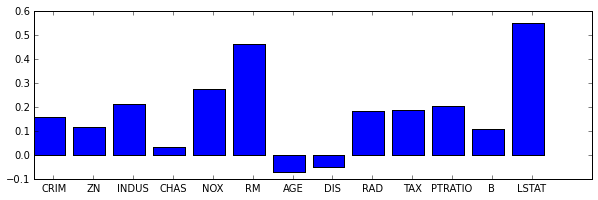

In [138]:
scores = []
for feature in xrange(13):
    reg = DecisionTreeRegressor(max_depth=4)
    reg.fit(X_train[:,feature].reshape(-1,1), y_train)
    print "{0}: {1}.".format(boston.feature_names[feature], reg.score(X_test[:,feature].reshape(-1,1), y_test))
    scores.append(reg.score(X_test[:,feature].reshape(-1,1), y_test))
pl.figure(figsize=(10,3))
pl.bar(list(xrange(0,13)), scores)
pl.xticks([i+.5 for i in xrange(0,13)],boston.feature_names)
pl.show()

AGE and DIS are negative (r-squared is irrelevant here), but the scores for LSTAT and RM are quite good. This might suggest that these features are more important than the others.  Let's plot them, add our prediction to each plot, and finally fit a simple univariate linear regression to see the trend line.

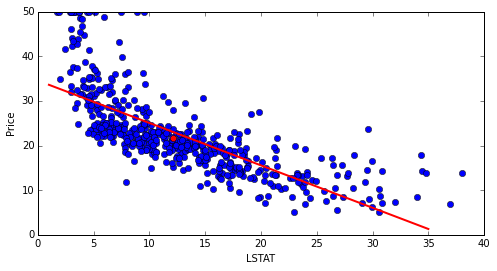

In [137]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(boston.data[:, np.newaxis, 12], y)
lin_x_test = [[1],[35]]
lin_y_pred = lin_reg.predict(lin_x_test)

# Training/Test dataset split
regression = DecisionTreeRegressor(max_depth=4)
regression.fit(X, y)

x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]

prediction = regression.predict(x)
pl.figure(figsize=(8,4))
pl.plot(X[:,12], y, 'o')
pl.plot(12.13, prediction, 'o', c='r')
pl.plot(lin_x_test, lin_y_pred, '-', linewidth=2)
pl.xlabel('LSTAT')
pl.ylabel('Price')
pl.show()


Above I plotted LSTAT variable. Red dot is our prediction, red line is a linear regression fit on this data. Our prediction is quite 'average' both for the dataset and the linear regression.

Next, let's do the same with RM data.

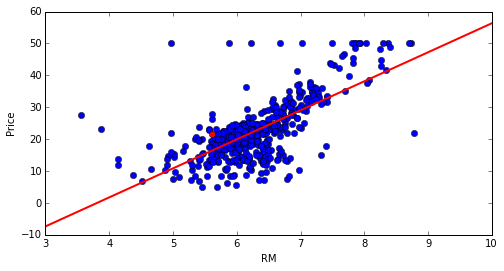

In [135]:
lin_reg = LinearRegression()
lin_reg.fit(boston.data[:, np.newaxis, 5], y)
lin_x_test = [[3],[10]]
lin_y_pred = lin_reg.predict(lin_x_test)

regression = DecisionTreeRegressor(max_depth=4)
regression.fit(X, y)

x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]

prediction = regression.predict(x)
pl.figure(figsize=(8,4))
pl.plot(X[:,5], y, 'o')
pl.plot(5.6090, prediction, 'o', c='r')
pl.plot(lin_x_test, lin_y_pred, '-', linewidth=2)
pl.xlabel('RM')
pl.ylabel('Price')
pl.show()


We see that this prediction is not an outlier in this case as well.

Finally, we plot DIS, the feature suggested by Gradient Boosting.

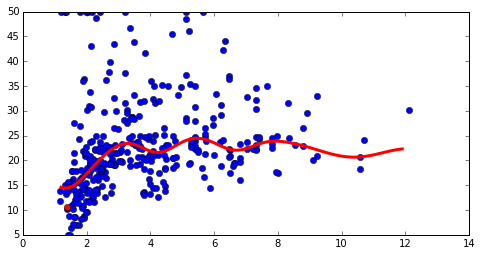

In [136]:
from sklearn.svm import SVR

svc = SVR(kernel='rbf', degree=3)
reg = DecisionTreeRegressor(max_depth=4)

feature_7 = X_train[:, np.newaxis, 7]

svc.fit(feature_7, y_train)
reg.fit(feature_7, y_train)

X_predict = np.arange(1.2,12,0.1).reshape(-1,1)
y_predict = svc.predict(X_predict)

x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]

prediction = reg.predict(1.385)
pl.figure(figsize=(8,4))
pl.plot(feature_7, y_train, 'o')
pl.plot(X_predict, y_predict, '-', c='r', linewidth=3)
pl.plot(1.385, prediction, marker='o', c='r')
pl.show()

Besides adding our prediction (red dot) I plotted SVM regression with rbf kernel (red curve). SVM has also a hard time fitting this data, but its result is good enough. Our target is not far from the regression and not an outlier.

This suggests that our model works well for a nonlinear feature, too.

**Conclusion**

Our model works good enough, generalizes the data and predicts new values. There were three steps to validate our model and its prediction:

* First, we looked at the measures of central tendency and found out that our prediction corresponded with the median price. That was a good sign our prediction was not an outlier.
* Second, we analyzed the prediction closely, defined the 'outlier' term and calculated the bounds outside of which a value was an outlier.
* Third, we found that there are three features which explain most of the variance. We isolated these variables, plotted scatter plots and univariate linear regressions (SVR for one feature with nonlinear relationship with the house price). We then concluded that our prediction looked reasonable in each case.

All of this means that for this vector of feature values:
[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]

the predicted house price is **21.63**.